## Dataset size experiment:

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [4]:
# Base Libraries
import os
import time
import shutil
import random
# import librosa
import numpy as np
import pandas as pd
# import seaborn as sns
# import tensorflow as tf
import opendatasets as od
# import matplotlib.pyplot as plt

# Preprocessing and Image
# import cv2
import librosa.display

from tqdm import tqdm
# from sklearn.model_selection import train_test_split
# from keras.utils import image_dataset_from_directory
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio/data'
# Using opendatasets let's download the data sets
od.download(dataset, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khrystynadolynska
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio


100%|██████████| 429M/429M [00:22<00:00, 19.8MB/s]


In [6]:
data_dir = './ravdess-emotional-speech-audio'
content_list = os.listdir(data_dir)
content_list

['Actor_09',
 'Actor_14',
 'Actor_19',
 'Actor_15',
 'Actor_07',
 'audio_speech_actors_01-24',
 'Actor_05',
 'Actor_23',
 'Actor_01',
 'Actor_13',
 'Actor_17',
 'Actor_06',
 'Actor_02',
 'Actor_18',
 'Actor_10',
 'Actor_20',
 'Actor_16',
 'Actor_08',
 'Actor_21',
 'Actor_12',
 'Actor_11',
 'Actor_03',
 'Actor_24',
 'Actor_04',
 'Actor_22']

In [7]:
content_list.remove('audio_speech_actors_01-24')
# content_list

In [33]:
label_to_char = {
    'Modality': {
        1: "full-AV",
        2: "video-only",
        3: "audio-only"
    },
    'Vocal_channel': {
        1: "speech",
        2: "song"
    },
    'Emotion': {
        1: "neutral",
        2: "calm",
        3: "happy",
        4: "sad",
        5: "angry",
        6: "fearful",
        7: "disgust",
        8: "surprised"
    },
    'Emotional_intensity': {
        1: "normal",
        2: "strong"
    },
    'Statement': {
        1: "Kids are talking by the door",
        2: "Dogs are sitting by the door"
    },
    'Repetition': {
        1: "1st repetition",
        2: "2nd repetition"
    },
    # 'Actor': parts[6],
    'Gender': {
        1: "Male",
        2: "Female"
    }
}

char_to_label = {
    'Modality': {
        "full-AV": 1,
        "video-only": 2,
        "audio-only": 3
    },
    'Vocal_channel': {
        "speech": 1,
        "song": 2
    },
    'Emotion': {
        "neutral": 1,
        "calm": 2,
        "happy": 3,
        "sad": 4,
        "angry": 5,
        "fearful": 6,
        "disgust": 7,
        "surprised": 8
    },
    'Emotional_intensity': {
        "normal": 1,
        "strong": 2
    },
    'Statement': {
        "Kids are talking by the door": 1,
        "Dogs are sitting by the door": 2
    },
    'Repetition': {
        "1st repetition": 1,
        "2nd repetition": 2
    },
    # 'Actor': parts[6],
    'Gender': {
        "Male": 1,
        "Female": 2
    }
}

label_convert = {
    'LABEL_0': "neutral",
    'LABEL_1': "calm",
    'LABEL_2': "happy",
    'LABEL_3': "sad",
    'LABEL_4': "angry",
    'LABEL_5': "fearful",
    'LABEL_6': "disgust",
    'LABEL_7': "surprised"
}

In [9]:
# !rm -r ./train_dataset
# !rm -r ./test_dataset

### 100% of data:

In [10]:
data_dir = './ravdess-emotional-speech-audio'
train_dir = './train_dataset_1'
test_dir = './test_dataset_1'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [11]:
content_list = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
content_list.remove('audio_speech_actors_01-24')
# content_list

In [38]:
test_samples = 1
train_samples = 11

train_male, train_female = 0, 0
test_male, test_female = 0, 0
test_actors, train_actors = [], []
random.shuffle(content_list)
for item in content_list:
  name_items = item.split('_')
  actor_id = int(name_items[1])
  if actor_id % 2 == 0:
    if test_female < test_samples:
      test_actors.append(item)
      test_female += 1
    elif train_female < train_samples:
      train_actors.append(item)
      train_female += 1
  else:
    if test_male < test_samples:
      test_actors.append(item)
      test_male += 1
    elif train_male < train_samples:
      train_actors.append(item)
      train_male += 1
print("Train_actors:", train_actors)
print("Test_actors:", test_actors)

Train_actors: ['Actor_14', 'Actor_12', 'Actor_20', 'Actor_06', 'Actor_11', 'Actor_22', 'Actor_05', 'Actor_19', 'Actor_24', 'Actor_10', 'Actor_21', 'Actor_01', 'Actor_02', 'Actor_18', 'Actor_07', 'Actor_04', 'Actor_09', 'Actor_15', 'Actor_17', 'Actor_16', 'Actor_23', 'Actor_13']
Test_actors: ['Actor_08', 'Actor_03']


In [37]:
def copy_directory(src, dst):
    if os.path.exists(dst):
        shutil.rmtree(dst)
    shutil.copytree(src, dst)

for actor_folder in content_list:
    source_path = os.path.join(data_dir, actor_folder)
    if actor_folder in test_actors:
        destination_path = os.path.join(test_dir, actor_folder)
    else:
        destination_path = os.path.join(train_dir, actor_folder)
    copy_directory(source_path, destination_path)


def extract_labels(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': char_to_label['Modality'][parts[0]],
        'Vocal_channel': char_to_label['Vocal_channel'][parts[1]],
        'Emotion': char_to_label['Emotion'][parts[2]],
        'Emotional_intensity': char_to_label['Emotional_intensity'][parts[3]],
        'Statement': char_to_label['Statement'][parts[4]],
        'Repetition': char_to_label['Repetition'][parts[5]],
        'Actor': parts[6],
        'Gender': char_to_label['Gender'][2] if int(parts[6]) % 2 == 0 else char_to_label['Gender'][1]
    }

def extract_chars(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': label_to_char['Modality'][int_parts[0]],
        'Vocal_channel': label_to_char['Vocal_channel'][int_parts[1]],
        'Emotion': label_to_char['Emotion'][int_parts[2]],
        'Emotional_intensity': label_to_char['Emotional_intensity'][int_parts[3]],
        'Statement': label_to_char['Statement'][int_parts[4]],
        'Repetition': label_to_char['Repetition'][int_parts[5]],
        'Actor': int_parts[6],
        'Gender': label_to_char['Gender'][2] if int(int_parts[6]) % 2 == 0 else label_to_char['Gender'][1]
    }


def load_dataset(data_dir):
    audio_files = []
    chars = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))
                chars.append(extract_chars(file))
    chars_df = pd.DataFrame(chars)
    for col in ['Modality', 'Vocal_channel', 'Emotion', 'Emotional_intensity', 'Statement', 'Repetition', 'Gender']:
        chars_df[col] = chars_df[col].astype(str)
    chars_df['Actor'] = chars_df['Actor'].astype(int)
    chars_df['Emotion_label'] = chars_df['Emotion'].map(char_to_label['Emotion'])
    return pd.DataFrame({'audio_file': audio_files, **chars_df})

train_dataset = load_dataset(train_dir)
test_dataset = load_dataset(test_dir)

In [14]:
print("Train dataset:")
train_dataset.head()

Train dataset:


,audio_file,Modality,Vocal_channel,Emotion,Emotional_intensity,Statement,Repetition,Actor,Gender,Emotion_label
0,./train_dataset_1/Actor_09/03-01-06-02-02-01-0...,audio-only,speech,fearful,strong,Dogs are sitting by the door,1st repetition,9,Male,6
1,./train_dataset_1/Actor_09/03-01-02-02-01-02-0...,audio-only,speech,calm,strong,Kids are talking by the door,2nd repetition,9,Male,2
2,./train_dataset_1/Actor_09/03-01-02-01-02-01-0...,audio-only,speech,calm,normal,Dogs are sitting by the door,1st repetition,9,Male,2
3,./train_dataset_1/Actor_09/03-01-05-02-02-01-0...,audio-only,speech,angry,strong,Dogs are sitting by the door,1st repetition,9,Male,5
4,./train_dataset_1/Actor_09/03-01-05-01-02-02-0...,audio-only,speech,angry,normal,Dogs are sitting by the door,2nd repetition,9,Male,5


In [15]:
train_dataset["Emotion"].value_counts()

,count
Emotion,
fearful,176
calm,176
angry,176
sad,176
disgust,176
happy,176
surprised,176
neutral,88


#### Tokenization:

In [16]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["audio_file"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_dataset).map(map_to_array)
test_data = Dataset.from_pandas(test_dataset).map(map_to_array)

num_labels=8
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")  # , num_labels=num_labels)

train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")

Map:   0%|          | 0/1320 [00:00<?, ? examples/s]

Map:   0%|          | 0/120 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

#### Dataset as object

In [17]:
import torch

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.pattern = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}
        # pattern = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
        # self.labels = [pattern[x] for x in labels]
        self.labels = [self.pattern.get(x) for x in labels]

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['Emotion_label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = CustomDataset(train_encodings, list(train_data["Emotion_label"]))
test_dataset = CustomDataset(test_encodings, list(test_data["Emotion_label"]))

#### Model

In [18]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW

num_labels=8
model = HubertForSequenceClassification.from_pretrained("superb/hubert-large-superb-er", num_labels=num_labels, ignore_mismatched_sizes=True)
# model = HubertForSequenceClassification.from_pretrained("facebook/hubert-large-ls960-ft", num_labels=8)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

optim = AdamW(model.parameters(), lr=1e-5)

config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

#### Training

In [19]:
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [20]:
from torch.utils.data import DataLoader

epoch = 5
model.train()

train_loss = list()
train_accuracies = list()
for epoch_i in range(epoch):
    print('Epoch %s/%s' % (epoch_i + 1, epoch))
    time.sleep(0.3)

    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    correct = 0
    count = 0
    epoch_loss = list()

    pbar = tqdm(train_loader)
    for batch in pbar:
        optim.zero_grad()
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']
        loss.backward()
        optim.step()

        predictions = predict(outputs)

        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'Loss': '{:.3f}'.format(loss.item()),
            'Accuracy': '{:.3f}'.format(accuracy)
        })

        epoch_loss.append(loss.item())
    pbar.close()

    train_loss += epoch_loss
    train_accuracies.append(accuracy)

Epoch 1/5


100%|██████████| 660/660 [04:59<00:00,  2.20it/s, Loss=0.903, Accuracy=0.336]


Epoch 2/5


100%|██████████| 660/660 [04:59<00:00,  2.20it/s, Loss=0.413, Accuracy=0.577]


Epoch 3/5


100%|██████████| 660/660 [04:59<00:00,  2.20it/s, Loss=0.382, Accuracy=0.715]


Epoch 4/5


100%|██████████| 660/660 [05:00<00:00,  2.20it/s, Loss=1.497, Accuracy=0.778]


Epoch 5/5


100%|██████████| 660/660 [04:58<00:00,  2.21it/s, Loss=0.774, Accuracy=0.805]


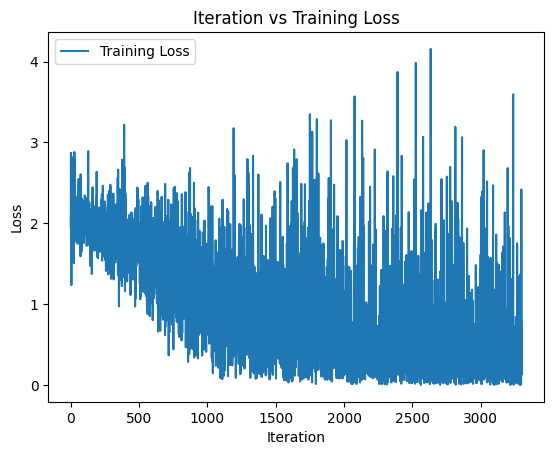

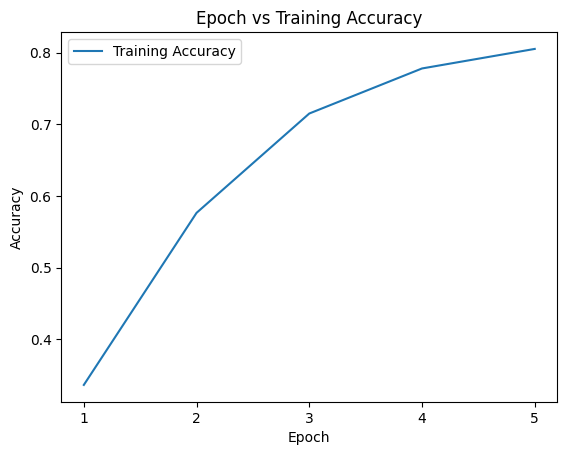

[1 2 3 4 5]
[0.33636363636363636, 0.5765151515151515, 0.7151515151515152, 0.7780303030303031, 0.8053030303030303]


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Iteration vs Training Loss
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Training Loss")
plt.legend()
plt.show()

# Plot Epoch vs Training Accuracy
acc_X_1 = np.arange(len(train_accuracies))+1
plt.plot(acc_X_1, train_accuracies,"-", label="Training Accuracy")
plt.xticks(acc_X_1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Training Accuracy")
plt.legend()
plt.show()

print(acc_X_1)
train_accuracies1=train_accuracies
print(train_accuracies1)

#### Testing

In [23]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model.eval()

with torch.no_grad():
    correct = 0
    count = 0
    record = {"Emotion_label":list(), "Predictions":list()}

    pbar = tqdm(test_loader)
    for batch in pbar:
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']

        predictions = predict(outputs)
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'loss': '{:.3f}'.format(loss.item()),
            'accuracy': '{:.3f}'.format(accuracy)
        })

        record["Emotion_label"] += labels.cpu().numpy().tolist()
        record["Predictions"] += predictions.cpu().numpy().tolist()

    pbar.close()

time.sleep(0.3)
print("The accuracy on the test dataset: %s%%" % round(accuracy*100,4))

100%|██████████| 120/120 [00:08<00:00, 13.61it/s, loss=0.098, accuracy=0.800]


The accuracy on the test dataset: 80.0%


In [101]:
from pandas.core.frame import DataFrame
df_record = DataFrame(record)
df_record.columns = ["Real emotion", "Predicted emotion"]

def get_emotion(label_id):
    return model.config.id2label[label_id]

df_record["Real emotion"] = df_record.apply(lambda x: get_emotion(x["Real emotion"]), axis=1)
df_record["Predicted emotion"] = df_record.apply(lambda x: get_emotion(x["Predicted emotion"]), axis=1)

# df = pd.concat([train_data.reset_index(drop=True), df_record["Predicted emotion"]], axis=1)
# df["Emotion"] = df.apply(lambda x: x["Emotion"][:8], axis=1)

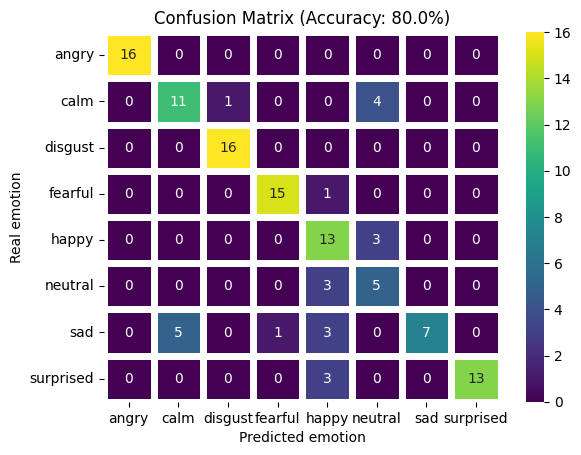

In [32]:
import seaborn as sns
crosstab = pd.crosstab(df_record["Real emotion"].map(label_convert), df_record["Predicted emotion"].map(label_convert))
sns.heatmap(crosstab, cmap='viridis', annot=True, fmt='g', linewidths=5)
# sns.heatmap(crosstab, cmap='Oranges', annot=True, fmt='g', linewidths=5)
accuracy = df_record["Real emotion"].eq(df_record["Predicted emotion"]).sum() / len(df_record["Real emotion"])
plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100,2))
plt.show()

### 75% of data:

In [53]:
# !rm -r ./train_dataset_2
# !rm -r ./test_dataset_2

In [54]:
data_dir = './ravdess-emotional-speech-audio'
train_dir = './train_dataset_2'
test_dir = './test_dataset_2'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [55]:
content_list = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
content_list.remove('audio_speech_actors_01-24')
# content_list

In [56]:
test_samples = 1
train_samples = 9

train_male, train_female = 0, 0
test_male, test_female = 0, 0
test_actors, train_actors = [], []
random.shuffle(content_list)
for item in content_list:
  name_items = item.split('_')
  actor_id = int(name_items[1])
  if actor_id % 2 == 0:
    if test_female < test_samples:
      test_actors.append(item)
      test_female += 1
    elif train_female < train_samples:
      train_actors.append(item)
      train_female += 1
  else:
    if test_male < test_samples:
      test_actors.append(item)
      test_male += 1
    elif train_male < train_samples:
      train_actors.append(item)
      train_male += 1
print("Train_actors:", train_actors)
print("Test_actors:", test_actors)

Train_actors: ['Actor_19', 'Actor_23', 'Actor_03', 'Actor_13', 'Actor_11', 'Actor_17', 'Actor_16', 'Actor_06', 'Actor_08', 'Actor_12', 'Actor_01', 'Actor_04', 'Actor_14', 'Actor_05', 'Actor_09', 'Actor_02', 'Actor_24', 'Actor_22']
Test_actors: ['Actor_21', 'Actor_18']


In [57]:
def copy_directory(src, dst):
    if os.path.exists(dst):
        shutil.rmtree(dst)
    shutil.copytree(src, dst)

for actor_folder in content_list:
    source_path = os.path.join(data_dir, actor_folder)
    if actor_folder in test_actors:
        destination_path = os.path.join(test_dir, actor_folder)
    elif actor_folder in train_actors:
        destination_path = os.path.join(train_dir, actor_folder)
    copy_directory(source_path, destination_path)


def extract_labels(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': char_to_label['Modality'][parts[0]],
        'Vocal_channel': char_to_label['Vocal_channel'][parts[1]],
        'Emotion': char_to_label['Emotion'][parts[2]],
        'Emotional_intensity': char_to_label['Emotional_intensity'][parts[3]],
        'Statement': char_to_label['Statement'][parts[4]],
        'Repetition': char_to_label['Repetition'][parts[5]],
        'Actor': parts[6],
        'Gender': char_to_label['Gender'][2] if int(parts[6]) % 2 == 0 else char_to_label['Gender'][1]
    }

def extract_chars(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': label_to_char['Modality'][int_parts[0]],
        'Vocal_channel': label_to_char['Vocal_channel'][int_parts[1]],
        'Emotion': label_to_char['Emotion'][int_parts[2]],
        'Emotional_intensity': label_to_char['Emotional_intensity'][int_parts[3]],
        'Statement': label_to_char['Statement'][int_parts[4]],
        'Repetition': label_to_char['Repetition'][int_parts[5]],
        'Actor': int_parts[6],
        'Gender': label_to_char['Gender'][2] if int(int_parts[6]) % 2 == 0 else label_to_char['Gender'][1]
    }


def load_dataset(data_dir):
    audio_files = []
    chars = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))
                chars.append(extract_chars(file))
    chars_df = pd.DataFrame(chars)
    for col in ['Modality', 'Vocal_channel', 'Emotion', 'Emotional_intensity', 'Statement', 'Repetition', 'Gender']:
        chars_df[col] = chars_df[col].astype(str)
    chars_df['Actor'] = chars_df['Actor'].astype(int)
    chars_df['Emotion_label'] = chars_df['Emotion'].map(char_to_label['Emotion'])
    return pd.DataFrame({'audio_file': audio_files, **chars_df})

train_dataset = load_dataset(train_dir)
test_dataset = load_dataset(test_dir)

In [58]:
print("Train dataset:")
train_dataset.head()

Train dataset:


,audio_file,Modality,Vocal_channel,Emotion,Emotional_intensity,Statement,Repetition,Actor,Gender,Emotion_label
0,./train_dataset_2/Actor_09/03-01-06-02-02-01-0...,audio-only,speech,fearful,strong,Dogs are sitting by the door,1st repetition,9,Male,6
1,./train_dataset_2/Actor_09/03-01-02-02-01-02-0...,audio-only,speech,calm,strong,Kids are talking by the door,2nd repetition,9,Male,2
2,./train_dataset_2/Actor_09/03-01-02-01-02-01-0...,audio-only,speech,calm,normal,Dogs are sitting by the door,1st repetition,9,Male,2
3,./train_dataset_2/Actor_09/03-01-05-02-02-01-0...,audio-only,speech,angry,strong,Dogs are sitting by the door,1st repetition,9,Male,5
4,./train_dataset_2/Actor_09/03-01-05-01-02-02-0...,audio-only,speech,angry,normal,Dogs are sitting by the door,2nd repetition,9,Male,5


In [59]:
train_dataset["Emotion"].value_counts()

,count
Emotion,
fearful,144
calm,144
angry,144
sad,144
disgust,144
happy,144
surprised,144
neutral,72


#### Tokenization:

In [60]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["audio_file"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_dataset).map(map_to_array)
test_data = Dataset.from_pandas(test_dataset).map(map_to_array)

num_labels=8
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")  # , num_labels=num_labels)

train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")

Map:   0%|          | 0/1080 [00:00<?, ? examples/s]

Map:   0%|          | 0/120 [00:00<?, ? examples/s]

#### Dataset as object

In [61]:
import torch

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.pattern = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}
        # pattern = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
        # self.labels = [pattern[x] for x in labels]
        self.labels = [self.pattern.get(x) for x in labels]

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['Emotion_label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = CustomDataset(train_encodings, list(train_data["Emotion_label"]))
test_dataset = CustomDataset(test_encodings, list(test_data["Emotion_label"]))

#### Model

In [62]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW

num_labels=8
model = HubertForSequenceClassification.from_pretrained("superb/hubert-large-superb-er", num_labels=num_labels, ignore_mismatched_sizes=True)
# model = HubertForSequenceClassification.from_pretrained("facebook/hubert-large-ls960-ft", num_labels=8)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

optim = AdamW(model.parameters(), lr=1e-5)

Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

#### Training

In [63]:
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [64]:
from torch.utils.data import DataLoader

epoch = 5
model.train()

train_loss = list()
train_accuracies = list()
for epoch_i in range(epoch):
    print('Epoch %s/%s' % (epoch_i + 1, epoch))
    time.sleep(0.3)

    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    correct = 0
    count = 0
    epoch_loss = list()

    pbar = tqdm(train_loader)
    for batch in pbar:
        optim.zero_grad()
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']
        loss.backward()
        optim.step()

        predictions = predict(outputs)

        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'Loss': '{:.3f}'.format(loss.item()),
            'Accuracy': '{:.3f}'.format(accuracy)
        })
        epoch_loss.append(loss.item())
    pbar.close()

    train_loss += epoch_loss
    train_accuracies.append(accuracy)

Epoch 1/5


100%|██████████| 540/540 [04:05<00:00,  2.20it/s, Loss=1.726, Accuracy=0.281]


Epoch 2/5


100%|██████████| 540/540 [04:05<00:00,  2.20it/s, Loss=0.767, Accuracy=0.543]


Epoch 3/5


100%|██████████| 540/540 [04:05<00:00,  2.20it/s, Loss=0.382, Accuracy=0.691]


Epoch 4/5


100%|██████████| 540/540 [04:04<00:00,  2.21it/s, Loss=1.235, Accuracy=0.774]


Epoch 5/5


100%|██████████| 540/540 [04:04<00:00,  2.21it/s, Loss=0.124, Accuracy=0.803]


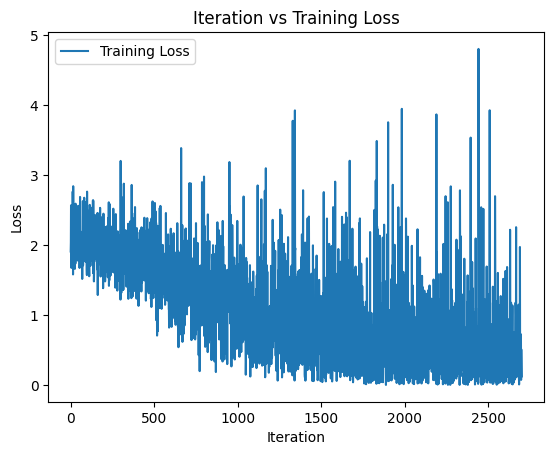

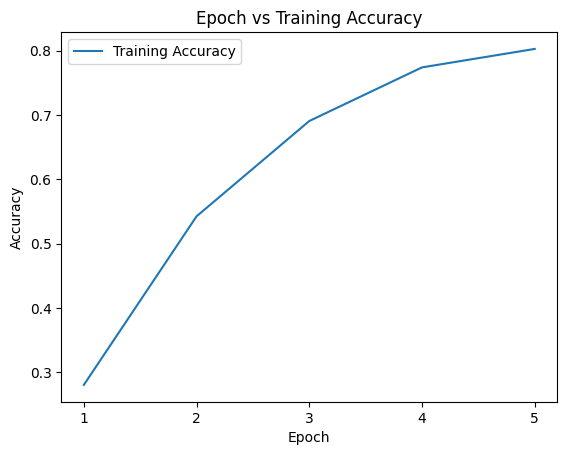

[1 2 3 4 5]
[0.28055555555555556, 0.5425925925925926, 0.6907407407407408, 0.774074074074074, 0.8027777777777778]


In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Iteration vs Training Loss
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Training Loss")
plt.legend()
plt.show()

# Plot Epoch vs Training Accuracy
acc_X_2 = np.arange(len(train_accuracies))+1
plt.plot(acc_X_2, train_accuracies,"-", label="Training Accuracy")
plt.xticks(acc_X_2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Training Accuracy")
plt.legend()
plt.show()

print(acc_X_2)
train_accuracies_2 = train_accuracies
print(train_accuracies_2)

#### Testing

In [66]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model.eval()

with torch.no_grad():
    correct = 0
    count = 0
    record = {"Emotion_label":list(), "Predictions":list()}

    pbar = tqdm(test_loader)
    for batch in pbar:
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']

        predictions = predict(outputs)
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'loss': '{:.3f}'.format(loss.item()),
            'accuracy': '{:.3f}'.format(accuracy)
        })

        record["Emotion_label"] += labels.cpu().numpy().tolist()
        record["Predictions"] += predictions.cpu().numpy().tolist()

    pbar.close()

time.sleep(0.3)
print("The accuracy on the test dataset: %s%%" % round(accuracy*100,4))

100%|██████████| 120/120 [00:09<00:00, 13.25it/s, loss=0.459, accuracy=0.792]


The accuracy on the test dataset: 79.1667%


In [67]:
from pandas.core.frame import DataFrame
df_record = DataFrame(record)
df_record.columns = ["Real emotion", "Predicted emotion"]

def get_emotion(label_id):
    return model.config.id2label[label_id]

df_record["Real emotion"] = df_record.apply(lambda x: get_emotion(x["Real emotion"]), axis=1)
df_record["Predicted emotion"] = df_record.apply(lambda x: get_emotion(x["Predicted emotion"]), axis=1)

# df = pd.concat([train_data.reset_index(drop=True), df_record["Predicted emotion"]], axis=1)
# df["Emotion"] = df.apply(lambda x: x["Emotion"][:8], axis=1)

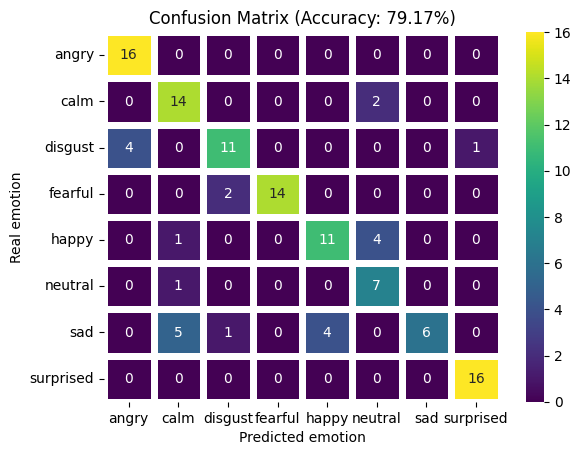

In [68]:
import seaborn as sns
crosstab = pd.crosstab(df_record["Real emotion"].map(label_convert), df_record["Predicted emotion"].map(label_convert))
sns.heatmap(crosstab, cmap='viridis', annot=True, fmt='g', linewidths=5)
# sns.heatmap(crosstab, cmap='Oranges', annot=True, fmt='g', linewidths=5)
accuracy = df_record["Real emotion"].eq(df_record["Predicted emotion"]).sum() / len(df_record["Real emotion"])
plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100,2))
plt.show()

### 50% of data:

In [69]:
# !rm -r ./train_dataset_3
# !rm -r ./test_dataset_3

In [70]:
data_dir = './ravdess-emotional-speech-audio'
train_dir = './train_dataset_3'
test_dir = './test_dataset_3'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [71]:
content_list = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
content_list.remove('audio_speech_actors_01-24')
# content_list

In [72]:
test_samples = 1
train_samples = 6

train_male, train_female = 0, 0
test_male, test_female = 0, 0
test_actors, train_actors = [], []
random.shuffle(content_list)
for item in content_list:
  name_items = item.split('_')
  actor_id = int(name_items[1])
  if actor_id % 2 == 0:
    if test_female < test_samples:
      test_actors.append(item)
      test_female += 1
    elif train_female < train_samples:
      train_actors.append(item)
      train_female += 1
  else:
    if test_male < test_samples:
      test_actors.append(item)
      test_male += 1
    elif train_male < train_samples:
      train_actors.append(item)
      train_male += 1
print("Train_actors:", train_actors)
print("Test_actors:", test_actors)

Train_actors: ['Actor_03', 'Actor_05', 'Actor_13', 'Actor_11', 'Actor_09', 'Actor_19', 'Actor_02', 'Actor_14', 'Actor_18', 'Actor_10', 'Actor_24', 'Actor_16']
Test_actors: ['Actor_01', 'Actor_06']


In [73]:
def copy_directory(src, dst):
    if os.path.exists(dst):
        shutil.rmtree(dst)
    shutil.copytree(src, dst)

for actor_folder in content_list:
    source_path = os.path.join(data_dir, actor_folder)
    if actor_folder in test_actors:
        destination_path = os.path.join(test_dir, actor_folder)
    elif actor_folder in train_actors:
        destination_path = os.path.join(train_dir, actor_folder)
    copy_directory(source_path, destination_path)


def extract_labels(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': char_to_label['Modality'][parts[0]],
        'Vocal_channel': char_to_label['Vocal_channel'][parts[1]],
        'Emotion': char_to_label['Emotion'][parts[2]],
        'Emotional_intensity': char_to_label['Emotional_intensity'][parts[3]],
        'Statement': char_to_label['Statement'][parts[4]],
        'Repetition': char_to_label['Repetition'][parts[5]],
        'Actor': parts[6],
        'Gender': char_to_label['Gender'][2] if int(parts[6]) % 2 == 0 else char_to_label['Gender'][1]
    }

def extract_chars(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': label_to_char['Modality'][int_parts[0]],
        'Vocal_channel': label_to_char['Vocal_channel'][int_parts[1]],
        'Emotion': label_to_char['Emotion'][int_parts[2]],
        'Emotional_intensity': label_to_char['Emotional_intensity'][int_parts[3]],
        'Statement': label_to_char['Statement'][int_parts[4]],
        'Repetition': label_to_char['Repetition'][int_parts[5]],
        'Actor': int_parts[6],
        'Gender': label_to_char['Gender'][2] if int(int_parts[6]) % 2 == 0 else label_to_char['Gender'][1]
    }


def load_dataset(data_dir):
    audio_files = []
    chars = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))
                chars.append(extract_chars(file))
    chars_df = pd.DataFrame(chars)
    for col in ['Modality', 'Vocal_channel', 'Emotion', 'Emotional_intensity', 'Statement', 'Repetition', 'Gender']:
        chars_df[col] = chars_df[col].astype(str)
    chars_df['Actor'] = chars_df['Actor'].astype(int)
    chars_df['Emotion_label'] = chars_df['Emotion'].map(char_to_label['Emotion'])
    return pd.DataFrame({'audio_file': audio_files, **chars_df})

train_dataset = load_dataset(train_dir)
test_dataset = load_dataset(test_dir)

In [74]:
print("Train dataset:")
train_dataset.head()

Train dataset:


,audio_file,Modality,Vocal_channel,Emotion,Emotional_intensity,Statement,Repetition,Actor,Gender,Emotion_label
0,./train_dataset_3/Actor_09/03-01-06-02-02-01-0...,audio-only,speech,fearful,strong,Dogs are sitting by the door,1st repetition,9,Male,6
1,./train_dataset_3/Actor_09/03-01-02-02-01-02-0...,audio-only,speech,calm,strong,Kids are talking by the door,2nd repetition,9,Male,2
2,./train_dataset_3/Actor_09/03-01-02-01-02-01-0...,audio-only,speech,calm,normal,Dogs are sitting by the door,1st repetition,9,Male,2
3,./train_dataset_3/Actor_09/03-01-05-02-02-01-0...,audio-only,speech,angry,strong,Dogs are sitting by the door,1st repetition,9,Male,5
4,./train_dataset_3/Actor_09/03-01-05-01-02-02-0...,audio-only,speech,angry,normal,Dogs are sitting by the door,2nd repetition,9,Male,5


In [75]:
train_dataset["Emotion"].value_counts()

,count
Emotion,
fearful,96
calm,96
angry,96
sad,96
disgust,96
happy,96
surprised,96
neutral,48


#### Tokenization:

In [76]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["audio_file"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_dataset).map(map_to_array)
test_data = Dataset.from_pandas(test_dataset).map(map_to_array)

num_labels=8
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")  # , num_labels=num_labels)

train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")

Map:   0%|          | 0/720 [00:00<?, ? examples/s]

Map:   0%|          | 0/120 [00:00<?, ? examples/s]

#### Dataset as object

In [77]:
import torch

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.pattern = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}
        # pattern = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
        # self.labels = [pattern[x] for x in labels]
        self.labels = [self.pattern.get(x) for x in labels]

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['Emotion_label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = CustomDataset(train_encodings, list(train_data["Emotion_label"]))
test_dataset = CustomDataset(test_encodings, list(test_data["Emotion_label"]))

#### Model

In [78]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW

num_labels=8
model = HubertForSequenceClassification.from_pretrained("superb/hubert-large-superb-er", num_labels=num_labels, ignore_mismatched_sizes=True)
# model = HubertForSequenceClassification.from_pretrained("facebook/hubert-large-ls960-ft", num_labels=8)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

optim = AdamW(model.parameters(), lr=1e-5)

Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

#### Training

In [79]:
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [80]:
from torch.utils.data import DataLoader

epoch = 5
model.train()

train_loss = list()
train_accuracies = list()
for epoch_i in range(epoch):
    print('Epoch %s/%s' % (epoch_i + 1, epoch))
    time.sleep(0.3)

    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    correct = 0
    count = 0
    epoch_loss = list()

    pbar = tqdm(train_loader)
    for batch in pbar:
        optim.zero_grad()
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']
        loss.backward()
        optim.step()

        predictions = predict(outputs)

        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'Loss': '{:.3f}'.format(loss.item()),
            'Accuracy': '{:.3f}'.format(accuracy)
        })
        epoch_loss.append(loss.item())
    pbar.close()

    train_loss += epoch_loss
    train_accuracies.append(accuracy)

Epoch 1/5


100%|██████████| 360/360 [02:44<00:00,  2.19it/s, Loss=1.122, Accuracy=0.243]


Epoch 2/5


100%|██████████| 360/360 [02:43<00:00,  2.21it/s, Loss=2.158, Accuracy=0.450]


Epoch 3/5


100%|██████████| 360/360 [02:44<00:00,  2.19it/s, Loss=1.765, Accuracy=0.631]


Epoch 4/5


100%|██████████| 360/360 [02:43<00:00,  2.20it/s, Loss=0.487, Accuracy=0.726]


Epoch 5/5


100%|██████████| 360/360 [02:43<00:00,  2.20it/s, Loss=0.114, Accuracy=0.787]


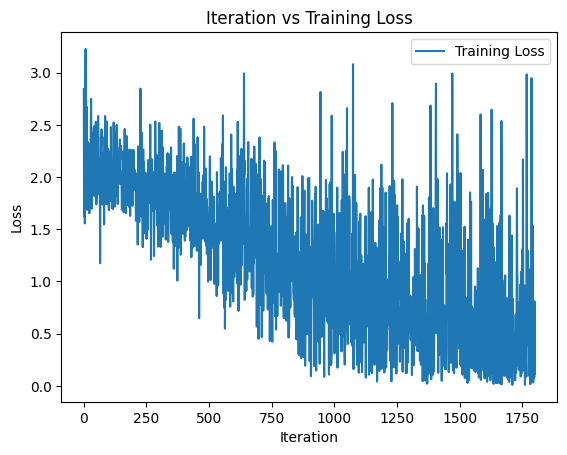

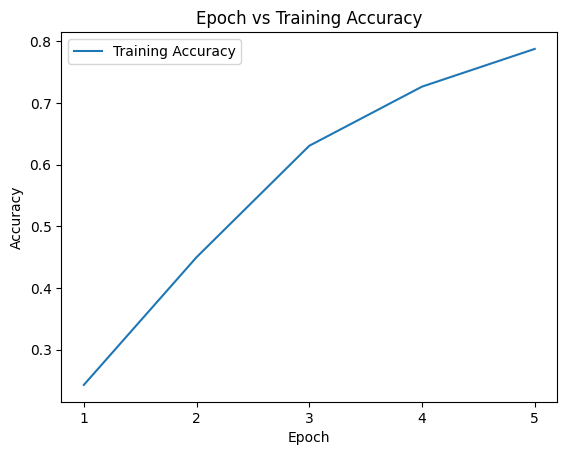

[1 2 3 4 5]
[0.24305555555555555, 0.45, 0.6305555555555555, 0.7263888888888889, 0.7875]


In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Iteration vs Training Loss
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Training Loss")
plt.legend()
plt.show()

# Plot Epoch vs Training Accuracy
acc_X_3 = np.arange(len(train_accuracies))+1
plt.plot(acc_X_3, train_accuracies,"-", label="Training Accuracy")
plt.xticks(acc_X_3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Training Accuracy")
plt.legend()
plt.show()

print(acc_X_3)
train_accuracies_3 = train_accuracies
print(train_accuracies_3)

#### Testing

In [82]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model.eval()

with torch.no_grad():
    correct = 0
    count = 0
    record = {"Emotion_label":list(), "Predictions":list()}

    pbar = tqdm(test_loader)
    for batch in pbar:
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']

        predictions = predict(outputs)
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'loss': '{:.3f}'.format(loss.item()),
            'accuracy': '{:.3f}'.format(accuracy)
        })

        record["Emotion_label"] += labels.cpu().numpy().tolist()
        record["Predictions"] += predictions.cpu().numpy().tolist()

    pbar.close()

time.sleep(0.3)
print("The accuracy on the test dataset: %s%%" % round(accuracy*100,4))

100%|██████████| 120/120 [00:09<00:00, 13.12it/s, loss=1.827, accuracy=0.733]


The accuracy on the test dataset: 73.3333%


In [83]:
from pandas.core.frame import DataFrame
df_record = DataFrame(record)
df_record.columns = ["Real emotion", "Predicted emotion"]

def get_emotion(label_id):
    return model.config.id2label[label_id]

df_record["Real emotion"] = df_record.apply(lambda x: get_emotion(x["Real emotion"]), axis=1)
df_record["Predicted emotion"] = df_record.apply(lambda x: get_emotion(x["Predicted emotion"]), axis=1)

# df = pd.concat([train_data.reset_index(drop=True), df_record["Predicted emotion"]], axis=1)
# df["Emotion"] = df.apply(lambda x: x["Emotion"][:8], axis=1)

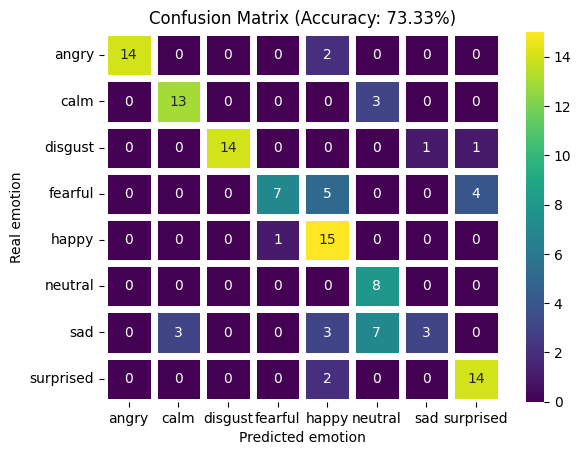

In [84]:
import seaborn as sns
crosstab = pd.crosstab(df_record["Real emotion"].map(label_convert), df_record["Predicted emotion"].map(label_convert))
sns.heatmap(crosstab, cmap='viridis', annot=True, fmt='g', linewidths=5)
# sns.heatmap(crosstab, cmap='Oranges', annot=True, fmt='g', linewidths=5)
accuracy = df_record["Real emotion"].eq(df_record["Predicted emotion"]).sum() / len(df_record["Real emotion"])
plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100,2))
plt.show()

### 25% of data:

In [85]:
# !rm -r ./train_dataset_4
# !rm -r ./test_dataset_4

In [86]:
data_dir = './ravdess-emotional-speech-audio'
train_dir = './train_dataset_4'
test_dir = './test_dataset_4'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [87]:
content_list = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
content_list.remove('audio_speech_actors_01-24')
# content_list

In [88]:
test_samples = 1
train_samples = 3

train_male, train_female = 0, 0
test_male, test_female = 0, 0
test_actors, train_actors = [], []
random.shuffle(content_list)
for item in content_list:
  name_items = item.split('_')
  actor_id = int(name_items[1])
  if actor_id % 2 == 0:
    if test_female < test_samples:
      test_actors.append(item)
      test_female += 1
    elif train_female < train_samples:
      train_actors.append(item)
      train_female += 1
  else:
    if test_male < test_samples:
      test_actors.append(item)
      test_male += 1
    elif train_male < train_samples:
      train_actors.append(item)
      train_male += 1
print("Train_actors:", train_actors)
print("Test_actors:", test_actors)

Train_actors: ['Actor_22', 'Actor_06', 'Actor_09', 'Actor_20', 'Actor_01', 'Actor_19']
Test_actors: ['Actor_12', 'Actor_23']


In [89]:
def copy_directory(src, dst):
    if os.path.exists(dst):
        shutil.rmtree(dst)
    shutil.copytree(src, dst)

for actor_folder in content_list:
    source_path = os.path.join(data_dir, actor_folder)
    if actor_folder in test_actors:
        destination_path = os.path.join(test_dir, actor_folder)
    elif actor_folder in train_actors:
        destination_path = os.path.join(train_dir, actor_folder)
    copy_directory(source_path, destination_path)


def extract_labels(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': char_to_label['Modality'][parts[0]],
        'Vocal_channel': char_to_label['Vocal_channel'][parts[1]],
        'Emotion': char_to_label['Emotion'][parts[2]],
        'Emotional_intensity': char_to_label['Emotional_intensity'][parts[3]],
        'Statement': char_to_label['Statement'][parts[4]],
        'Repetition': char_to_label['Repetition'][parts[5]],
        'Actor': parts[6],
        'Gender': char_to_label['Gender'][2] if int(parts[6]) % 2 == 0 else char_to_label['Gender'][1]
    }

def extract_chars(filename):
    filename_without_extension = os.path.splitext(filename)[0]
    parts = filename_without_extension.split('-')
    int_parts = [int(part) for part in parts]
    return {
        'Modality': label_to_char['Modality'][int_parts[0]],
        'Vocal_channel': label_to_char['Vocal_channel'][int_parts[1]],
        'Emotion': label_to_char['Emotion'][int_parts[2]],
        'Emotional_intensity': label_to_char['Emotional_intensity'][int_parts[3]],
        'Statement': label_to_char['Statement'][int_parts[4]],
        'Repetition': label_to_char['Repetition'][int_parts[5]],
        'Actor': int_parts[6],
        'Gender': label_to_char['Gender'][2] if int(int_parts[6]) % 2 == 0 else label_to_char['Gender'][1]
    }


def load_dataset(data_dir):
    audio_files = []
    chars = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))
                chars.append(extract_chars(file))
    chars_df = pd.DataFrame(chars)
    for col in ['Modality', 'Vocal_channel', 'Emotion', 'Emotional_intensity', 'Statement', 'Repetition', 'Gender']:
        chars_df[col] = chars_df[col].astype(str)
    chars_df['Actor'] = chars_df['Actor'].astype(int)
    chars_df['Emotion_label'] = chars_df['Emotion'].map(char_to_label['Emotion'])
    return pd.DataFrame({'audio_file': audio_files, **chars_df})

train_dataset = load_dataset(train_dir)
test_dataset = load_dataset(test_dir)

In [90]:
print("Train dataset:")
train_dataset.head()

Train dataset:


,audio_file,Modality,Vocal_channel,Emotion,Emotional_intensity,Statement,Repetition,Actor,Gender,Emotion_label
0,./train_dataset_4/Actor_09/03-01-06-02-02-01-0...,audio-only,speech,fearful,strong,Dogs are sitting by the door,1st repetition,9,Male,6
1,./train_dataset_4/Actor_09/03-01-02-02-01-02-0...,audio-only,speech,calm,strong,Kids are talking by the door,2nd repetition,9,Male,2
2,./train_dataset_4/Actor_09/03-01-02-01-02-01-0...,audio-only,speech,calm,normal,Dogs are sitting by the door,1st repetition,9,Male,2
3,./train_dataset_4/Actor_09/03-01-05-02-02-01-0...,audio-only,speech,angry,strong,Dogs are sitting by the door,1st repetition,9,Male,5
4,./train_dataset_4/Actor_09/03-01-05-01-02-02-0...,audio-only,speech,angry,normal,Dogs are sitting by the door,2nd repetition,9,Male,5


In [91]:
train_dataset["Emotion"].value_counts()

,count
Emotion,
fearful,48
calm,48
angry,48
sad,48
disgust,48
happy,48
surprised,48
neutral,24


#### Tokenization:

In [92]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["audio_file"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_dataset).map(map_to_array)
test_data = Dataset.from_pandas(test_dataset).map(map_to_array)

num_labels=8
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-large-superb-er")  # , num_labels=num_labels)

train_encodings = feature_extractor(list(train_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")
test_encodings = feature_extractor(list(test_data["speech"]), sampling_rate=16000, padding=True, return_tensors="pt")

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

Map:   0%|          | 0/120 [00:00<?, ? examples/s]

#### Dataset as object

In [93]:
import torch

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.pattern = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}
        # pattern = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
        # self.labels = [pattern[x] for x in labels]
        self.labels = [self.pattern.get(x) for x in labels]

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['Emotion_label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = CustomDataset(train_encodings, list(train_data["Emotion_label"]))
test_dataset = CustomDataset(test_encodings, list(test_data["Emotion_label"]))

#### Model

In [94]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW

num_labels=8
model = HubertForSequenceClassification.from_pretrained("superb/hubert-large-superb-er", num_labels=num_labels, ignore_mismatched_sizes=True)
# model = HubertForSequenceClassification.from_pretrained("facebook/hubert-large-ls960-ft", num_labels=8)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

optim = AdamW(model.parameters(), lr=1e-5)

Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

#### Training

In [95]:
def predict(outputs):
    probabilities = torch.softmax(outputs["logits"], dim=1)
    predictions = torch.argmax(probabilities, dim=1)
    return predictions

In [96]:
from torch.utils.data import DataLoader

epoch = 5
model.train()

train_loss = list()
train_accuracies = list()
for epoch_i in range(epoch):
    print('Epoch %s/%s' % (epoch_i + 1, epoch))
    time.sleep(0.3)

    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    correct = 0
    count = 0
    epoch_loss = list()

    pbar = tqdm(train_loader)
    for batch in pbar:
        optim.zero_grad()
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']
        loss.backward()
        optim.step()

        predictions = predict(outputs)

        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'Loss': '{:.3f}'.format(loss.item()),
            'Accuracy': '{:.3f}'.format(accuracy)
        })
        epoch_loss.append(loss.item())
    pbar.close()

    train_loss += epoch_loss
    train_accuracies.append(accuracy)

Epoch 1/5


100%|██████████| 180/180 [01:18<00:00,  2.28it/s, Loss=2.051, Accuracy=0.194]


Epoch 2/5


100%|██████████| 180/180 [01:17<00:00,  2.32it/s, Loss=1.737, Accuracy=0.286]


Epoch 3/5


100%|██████████| 180/180 [01:17<00:00,  2.32it/s, Loss=1.850, Accuracy=0.433]


Epoch 4/5


100%|██████████| 180/180 [01:17<00:00,  2.33it/s, Loss=2.158, Accuracy=0.519]


Epoch 5/5


100%|██████████| 180/180 [01:16<00:00,  2.34it/s, Loss=1.264, Accuracy=0.606]


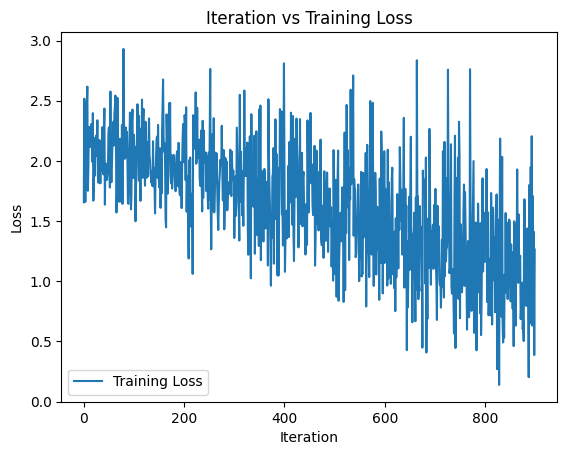

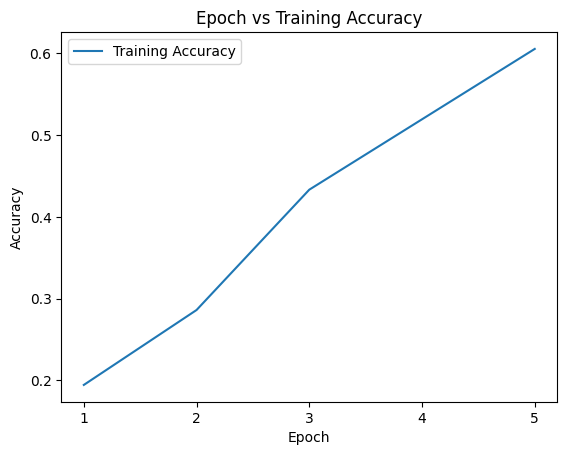

[1 2 3 4 5]
[0.19444444444444445, 0.2861111111111111, 0.43333333333333335, 0.5194444444444445, 0.6055555555555555]


In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Iteration vs Training Loss
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iteration vs Training Loss")
plt.legend()
plt.show()

# Plot Epoch vs Training Accuracy
acc_X_4 = np.arange(len(train_accuracies))+1
plt.plot(acc_X_4, train_accuracies,"-", label="Training Accuracy")
plt.xticks(acc_X_4)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Training Accuracy")
plt.legend()
plt.show()

print(acc_X_4)
train_accuracies_4 = train_accuracies
print(train_accuracies_4)

#### Testing

In [98]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model.eval()

with torch.no_grad():
    correct = 0
    count = 0
    record = {"Emotion_label":list(), "Predictions":list()}

    pbar = tqdm(test_loader)
    for batch in pbar:
        input_ids = batch['input_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['Emotion_label'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs['loss']

        predictions = predict(outputs)
        correct += predictions.eq(labels).sum().item()
        count += len(labels)
        accuracy = correct * 1.0 / count

        pbar.set_postfix({
            'loss': '{:.3f}'.format(loss.item()),
            'accuracy': '{:.3f}'.format(accuracy)
        })

        record["Emotion_label"] += labels.cpu().numpy().tolist()
        record["Predictions"] += predictions.cpu().numpy().tolist()

    pbar.close()

time.sleep(0.3)
print("The accuracy on the test dataset: %s%%" % round(accuracy*100,4))

100%|██████████| 120/120 [00:08<00:00, 13.54it/s, loss=2.109, accuracy=0.492]


The accuracy on the test dataset: 49.1667%


In [99]:
from pandas.core.frame import DataFrame
df_record = DataFrame(record)
df_record.columns = ["Real emotion", "Predicted emotion"]

def get_emotion(label_id):
    return model.config.id2label[label_id]

df_record["Real emotion"] = df_record.apply(lambda x: get_emotion(x["Real emotion"]), axis=1)
df_record["Predicted emotion"] = df_record.apply(lambda x: get_emotion(x["Predicted emotion"]), axis=1)

# df = pd.concat([train_data.reset_index(drop=True), df_record["Predicted emotion"]], axis=1)
# df["Emotion"] = df.apply(lambda x: x["Emotion"][:8], axis=1)

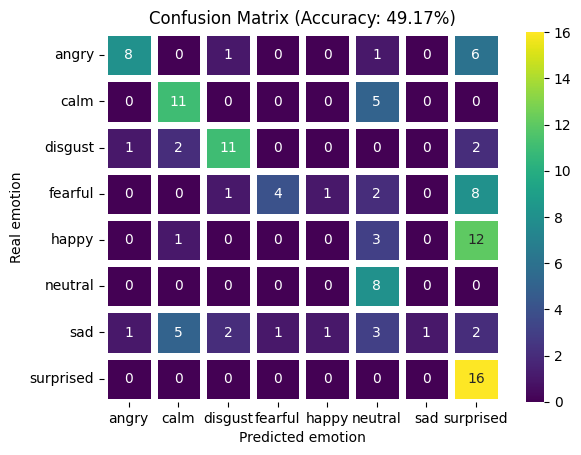

In [100]:
import seaborn as sns
crosstab = pd.crosstab(df_record["Real emotion"].map(label_convert), df_record["Predicted emotion"].map(label_convert))
sns.heatmap(crosstab, cmap='viridis', annot=True, fmt='g', linewidths=5)
# sns.heatmap(crosstab, cmap='Oranges', annot=True, fmt='g', linewidths=5)
accuracy = df_record["Real emotion"].eq(df_record["Predicted emotion"]).sum() / len(df_record["Real emotion"])
plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100,2))
plt.show()

### Comparing results:

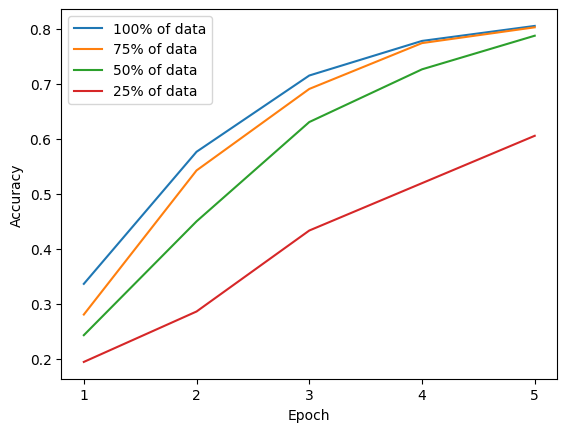

In [103]:
# acc_X_all = acc_X_1 + acc_X_2 + acc_X_3 + acc_X_4
# epochs = list(range(6))

plt.plot(acc_X_1, train_accuracies1,"-", label="100% of data")
plt.plot(acc_X_2, train_accuracies_2,"-", label="75% of data")
plt.plot(acc_X_3, train_accuracies_3,"-", label="50% of data")
plt.plot(acc_X_4, train_accuracies_4,"-", label="25% of data")
plt.xticks(acc_X_1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("")
plt.legend()
plt.show()

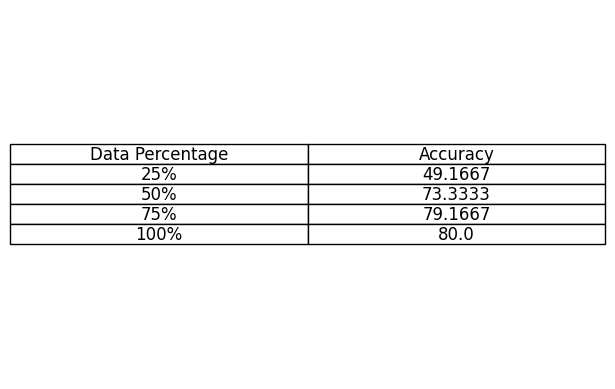

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

testing_results = {
    "25%": 49.1667,
    "50%": 73.3333,
    "75%": 79.1667,
    "100%": 80.0
}

df = pd.DataFrame(list(testing_results.items()), columns=["Data Percentage", "Accuracy"])
fig, ax = plt.subplots()

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()

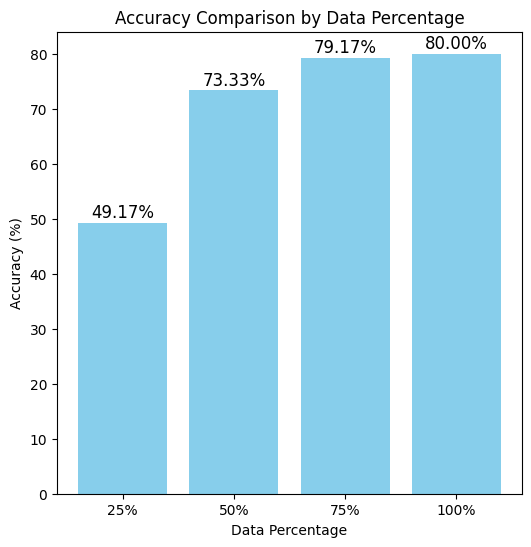

In [107]:
data_percentages = list(testing_results.keys())
accuracies = list(testing_results.values())

plt.figure(figsize=(6, 6))
plt.bar(data_percentages, accuracies, color='skyblue')

plt.xlabel('Data Percentage')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison by Data Percentage')

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()